# Seasonality map of Ireland

MODIS-EVI-derived Irish landcover seasonality dataset for 2006

Rory Scarrott (1), Brian O'Connor (1, 2), Ned Dwyer (1), and Fiona Cawkwell
(2)

(1) Coastal and Marine Research Centre, University College Cork
(2) Department of Geography, University College Cork

This research was funded by the Irish Environmental Protection Agency under
grant agreement 2007-CCRP-2.4.

This work is licenced under a Creative Commons Attribution 4.0 International
Licence

- Scarrott, R. G., O'Connor, B., Dwyer, N. and Cawkwell, F. (2010).
  'MODIS-EVI-derived Irish landcover seasonality dataset for 2006',
  Environmental Protection Agency project 2007-CCRP-2.4,
  University College Cork.
- O'Connor, B., Scarrott, R. and Dwyer, N. (2013).
  'Use of remote sensing in phenological research in Ireland',
  in Donnelly, A. and O'Neill, B. (eds), Climate Change Impacts on Phenology:
  Implications for Terrestrial Ecosystems,
  Climate Change Research Programme (CCRP) 2007-2013,
  Johnstown Castle, Co. Wexford, Ireland,
  Environmental Protection Agency, pp. 35-39. [Online]. Available at
  https://www.epa.ie/publications/research/climate-change/climate-change-impacts-on-phenology-implications-for-terrestrial-ecosystems.php
  (Accessed 19 August 2022).

In [1]:
# import libraries
import os
from datetime import datetime, timezone
from zipfile import ZipFile
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from dask.distributed import Client

In [2]:
print("Last updated:", datetime.now(tz=timezone.utc))

Last updated: 2023-02-22 11:22:33.078340+00:00


In [3]:
client = Client(n_workers=3, threads_per_worker=4, memory_limit="2GB")

In [4]:
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 3
Total threads: 12,Total memory: 5.59 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:41333,Workers: 3
Dashboard: http://127.0.0.1:8787/status,Total threads: 12
Started: Just now,Total memory: 5.59 GiB
Comm: tcp://127.0.0.1:42095,Total threads: 4
Dashboard: http://127.0.0.1:42435/status,Memory: 1.86 GiB
Nanny: tcp://127.0.0.1:32851,


In [5]:
# define data directory
DATA_DIR_BASE = os.path.join(
    "data", "climatic-regions", "seasonality-map-epa"
)

In [6]:
# the ZIP file containing the CLC 2018 data should be moved to this folder
DATA_DIR = os.path.join(DATA_DIR_BASE, "raw")

In [5]:
os.listdir(DATA_DIR)

['2006IESeasonalityDataset_FinalProductPackage',
 '2006IESeasonalityDataset_FinalProductPackage.zip']

In [7]:
ZIP_FILE = os.path.join(
    DATA_DIR, "2006IESeasonalityDataset_FinalProductPackage.zip"
)

In [7]:
# list of files/folders in the ZIP archive
ZipFile(ZIP_FILE).namelist()

['2006IESeasonalityDataset_FinalProductPackage/IrishSeasonalityMap2006_38Clusters_ScarrottEtAl2010.cpg',
 '2006IESeasonalityDataset_FinalProductPackage/IrishSeasonalityMap2006_38Clusters_ScarrottEtAl2010.dbf',
 '2006IESeasonalityDataset_FinalProductPackage/IrishSeasonalityMap2006_38Clusters_ScarrottEtAl2010.prj',
 '2006IESeasonalityDataset_FinalProductPackage/IrishSeasonalityMap2006_38Clusters_ScarrottEtAl2010.sbn',
 '2006IESeasonalityDataset_FinalProductPackage/IrishSeasonalityMap2006_38Clusters_ScarrottEtAl2010.sbx',
 '2006IESeasonalityDataset_FinalProductPackage/IrishSeasonalityMap2006_38Clusters_ScarrottEtAl2010.shp',
 '2006IESeasonalityDataset_FinalProductPackage/IrishSeasonalityMap2006_38Clusters_ScarrottEtAl2010.shp.xml',
 '2006IESeasonalityDataset_FinalProductPackage/IrishSeasonalityMap2006_38Clusters_ScarrottEtAl2010.shx',
 '2006IESeasonalityDataset_FinalProductPackage/IrishSeasonalityMap2006_38Clusters_ScarrottEtAl2010_class_signatures.xls',
 '2006IESeasonalityDataset_FinalPr

In [8]:
data = gpd.read_file(
    f"zip://{ZIP_FILE}!2006IESeasonalityDataset_FinalProductPackage/"
    "IrishSeasonalityMap2006_38Clusters_ScarrottEtAl2010.shp"
)

In [9]:
data.shape

(38, 4)

In [10]:
data.crs

<Derived Projected CRS: EPSG:32629>
Name: WGS 84 / UTM zone 29N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 12°W and 6°W, northern hemisphere between equator and 84°N, onshore and offshore. Algeria. Côte D'Ivoire (Ivory Coast). Faroe Islands. Guinea. Ireland. Jan Mayen. Mali. Mauritania. Morocco. Portugal. Sierra Leone. Spain. United Kingdom (UK). Western Sahara.
- bounds: (-12.0, 0.0, -6.0, 84.0)
Coordinate Operation:
- name: UTM zone 29N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [11]:
data

,ID,GRIDCODE,Class,geometry
0,1632,18,18,"MULTIPOLYGON (((466444.409 5697917.357, 466212..."
1,1633,1,1,"MULTIPOLYGON (((468760.973 5696990.732, 468760..."
2,1634,3,3,"MULTIPOLYGON (((464591.158 5696759.075, 464591..."
3,1635,2,2,"MULTIPOLYGON (((464822.814 5696759.075, 464822..."
4,1664,6,6,"MULTIPOLYGON (((465749.440 5699075.639, 465517..."
5,2337,4,4,"MULTIPOLYGON (((464591.158 5698380.670, 464359..."
6,2338,5,5,"MULTIPOLYGON (((467834.347 5699075.639, 467602..."
7,2339,8,8,"MULTIPOLYGON (((464359.502 5696527.419, 464127..."
8,2379,15,15,"MULTIPOLYGON (((445363.680 5701392.203, 445132..."
9,2380,14,14,"MULTIPOLYGON (((465054.471 5697685.701, 464822..."


In [12]:
# assign clusters to groups as defined in a draft paper by Scarrott et al.
groups = {
    1: 6,
    2: 6,
    3: 7,
    4: 7,
    5: 1,
    6: 7,
    7: 2,
    8: 7,
    9: 8,
    10: 3,
    11: 10,
    12: 7,
    13: 4,
    14: 10,
    15: 8,
    16: 10,
    17: 9,
    18: 10,
    19: 10,
    20: 5,
    21: 9,
    22: 10,
    23: 10,
    24: 10,
    25: 10,
    26: 9,
    27: 10,
    28: 10,
    29: 10,
    30: 10,
    31: 9,
    32: 10,
    33: 10,
    34: 10,
    35: 10,
    36: 10,
    37: 10,
    38: 10
}

In [13]:
data["Group"] = data["Class"].map(groups)

In [14]:
# convert column to string for plotting
data["plot_class"] = data["Class"].astype(str).str.zfill(2)
data["Group"] = data["Group"].astype(str).str.zfill(2)

In [15]:
data

,ID,GRIDCODE,Class,geometry,Group,plot_class
0,1632,18,18,"MULTIPOLYGON (((466444.409 5697917.357, 466212...",10,18
1,1633,1,1,"MULTIPOLYGON (((468760.973 5696990.732, 468760...",06,01
2,1634,3,3,"MULTIPOLYGON (((464591.158 5696759.075, 464591...",07,03
3,1635,2,2,"MULTIPOLYGON (((464822.814 5696759.075, 464822...",06,02
4,1664,6,6,"MULTIPOLYGON (((465749.440 5699075.639, 465517...",07,06
5,2337,4,4,"MULTIPOLYGON (((464591.158 5698380.670, 464359...",07,04
6,2338,5,5,"MULTIPOLYGON (((467834.347 5699075.639, 467602...",01,05
7,2339,8,8,"MULTIPOLYGON (((464359.502 5696527.419, 464127...",07,08
8,2379,15,15,"MULTIPOLYGON (((445363.680 5701392.203, 445132...",08,15
9,2380,14,14,"MULTIPOLYGON (((465054.471 5697685.701, 464822...",10,14


In [16]:
# new colour map
# https://stackoverflow.com/a/31052741
# sample the colormaps that you want to use. Use 20 from each so we get 40
# colours in total
colors1 = plt.cm.tab20b(np.linspace(0., 1, 20))
colors2 = plt.cm.tab20c(np.linspace(0, 1, 20))

# combine them and build a new colormap
colors = np.vstack((colors1, colors2))

2023-02-22 11:33:42,680 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-02-22 11:33:54,978 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-02-22 11:34:10,387 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)


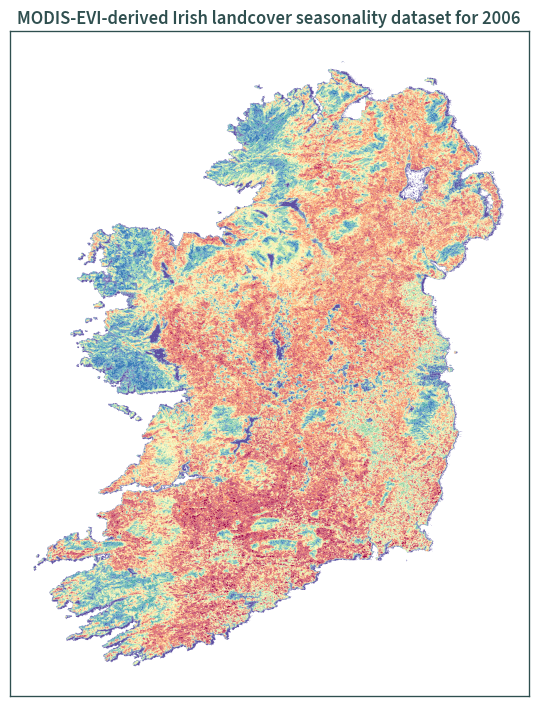

In [20]:
fig = data.to_crs(2157).plot(
    column="plot_class",
    # legend=True,
    figsize=(9, 9),
    cmap="Spectral_r",
    # legend_kwds=dict(loc="upper right", bbox_to_anchor=(1.18, 1.07))
)
# plt.ticklabel_format(style="scientific", scilimits=[-4, 4])
# fig.xaxis.set_major_locator(ticker.MultipleLocator(1e5))
# plt.text(
#     5.6e5, 5.68e6,
#     str(data.crs).upper() +
#     "\nScarrott et al. (2010), O'Connor et al. (2013)"
# )
fig.axes.tick_params(labelbottom=False, labelleft=False)
plt.title("MODIS-EVI-derived Irish landcover seasonality dataset for 2006")
plt.show()

2023-02-22 11:35:11,564 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-02-22 11:35:13,201 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-02-22 11:35:15,068 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-02-22 11:35:18,243 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-02-22 11:35:24,693 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-02-22 11:35:32,823 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-02-22 11:35:42,598 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-02-22 11:35:54,859 - distributed.utils_perf - WARNING - full garbage collections took

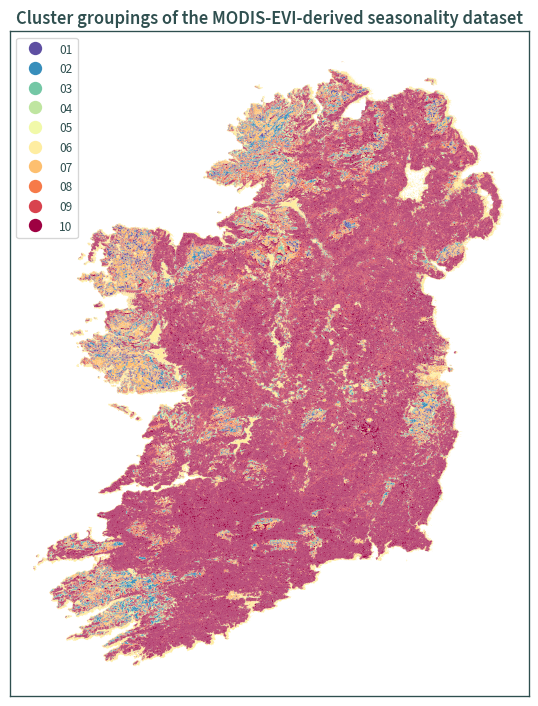

In [21]:
# see the excerpt of a draft paper by Scarrott et al. for more information
# about these groupings
fig = data.to_crs(2157).plot(
    column="Group",
    legend=True,
    figsize=(9, 9),
    cmap="Spectral_r",
    legend_kwds=dict(loc="upper left")
)
# plt.ticklabel_format(style="scientific", scilimits=[-4, 4])
# fig.xaxis.set_major_locator(ticker.MultipleLocator(1e5))
# plt.text(
#     5.6e5, 5.68e6,
#     str(data.crs).upper() +
#     "\nScarrott et al. (2010), O'Connor et al. (2013)"
# )
fig.axes.tick_params(labelbottom=False, labelleft=False)
plt.title("Cluster groupings of the MODIS-EVI-derived seasonality dataset")
plt.show()